## Problem 1 - Error Decomposition

Let $R$ denote the population risk, $\hat{R}$ denote the empirical risk, $F$ denote our hypothesis class (i.e., our function space), and $F_{\delta}$ denote a complexity-constrained hypothesis class (e.g., norm-regularized function space). Consider an arbitrary hypothesis $\hat{f} \in F_{\delta}$ for some $\delta > 0$.

### 1. Population Error Definition
The population risk for a hypothesis $f$ is defined as:
$$
R(f) = \mathbb{E}_{(x,y) \sim P} \left[ \ell(f(x), y) \right],
$$
where $P(x, y)$ is the true data distribution, and $\ell(f(x), y)$ is the loss function.

### 2. Error Decomposition
The excess risk $R(\hat{f}) - R(f^*)$, where $f^*$ is the optimal function in $F$, can be decomposed as follows:
$$
R(\hat{f}) - R(f^*) = \underbrace{\Bigl(R(\hat{f}) - \hat{R}(\hat{f})\Bigr) + \Bigl(\hat{R}(f_{\delta}^*) - R(f_{\delta}^*)\Bigr)}_{\text{Statistical Error}} + \underbrace{\Bigl(\hat{R}(\hat{f}) - \hat{R}(f_{\delta}^*)\Bigr)}_{\text{Optimization Error}} + \underbrace{\Bigl(R(f_{\delta}^*) - R(f^*)\Bigr)}_{\text{Approximation Error}},
$$
where:
- $f_{\delta}^* = \arg\min_{f \in F_{\delta}} R(f)$ is the best function within the constrained hypothesis class.
- $\hat{R}(f)$ is the empirical risk:
$$
\hat{R}(f) = \frac{1}{n} \sum_{i=1}^n \ell(f(x_i), y_i).
$$

#### Proof Outline:
1. **Statistical Error:** Arises because $\hat{R}(f)$ is an estimate of $R(f)$ based on finite data.
2. **Optimization Error:** Represents the gap between the empirical risk of our algorithm’s output $\hat{f}$ and the best possible empirical risk within $F_{\delta}$.
3. **Approximation Error:** Reflects the inherent limitation of the hypothesis class $F_{\delta}$ to approximate the optimal function $f^*$.

### 3. Meaning of Each Error
- **Optimization Error:** Decreases as optimization methods (e.g., gradient descent) better minimize $\hat{R}$. A high value indicates poor convergence.
- **Approximation Error:** Measures the expressiveness of $F_{\delta}$. It decreases if we allow a richer class but may lead to overfitting.
- **Statistical Error:** Decreases with more data, as $\hat{R}(f)$ becomes a better estimate of $R(f)$.

### 4. Effect of Gradient Descent
Gradient descent directly reduces the **optimization error** by finding a function $\hat{f}$ that minimizes $\hat{R}$. It does not affect the approximation error (a property of $F_{\delta}$) or the statistical error (which depends on the sample size).

### 5. Effect of Data Augmentation
Data augmentation primarily reduces the **statistical error** by increasing the diversity of the training data, thereby making the empirical risk a better approximation of the true risk.

---

## Problem 2 - Group Equivariance and Group Invariance

Let $\Omega$ denote our domain, and let $X(\Omega)$ be the set of signals defined on $\Omega$ (i.e., functions $x:\Omega\to\mathbb{R}$). Let $G$ be a symmetry group acting on $\Omega$, and let $\rho(g)$ represent the group action on signals, so that $(\rho(g)x)(\omega) = x(g^{-1}\omega)$.

### 1. Definition of G-Invariance
A function $h: X(\Omega) \to Y$ is **G-invariant** with respect to a group $G$ if
$$
h(\rho(g)x) = h(x) \quad \forall\, g \in G,\; x \in X(\Omega).
$$
This means that applying any transformation from $G$ to the input does not change the output.

*Example:* If $h(x)$ computes the mean of $x$, then $h$ is invariant under translations.

### 2. Definition of G-Equivariance
A function $f: X(\Omega) \to X(\Omega)$ is **G-equivariant** if
$$
f(\rho(g)x) = \rho(g) f(x) \quad \forall\, g \in G,\; x \in X(\Omega).
$$
This means that applying a transformation to the input and then $f$ is the same as applying $f$ first and then the transformation.

*Example:* A convolutional layer in a CNN is translation equivariant; shifting the input shifts the output feature maps.

### 3. Properties of Compositions

#### a) Composition \( h \circ f \)
Consider:
$$
(h \circ f)(\rho(g)x) = h\bigl(f(\rho(g)x)\bigr).
$$
Since $f$ is G-equivariant:
$$
f(\rho(g)x) = \rho(g) f(x).
$$
Then:
$$
(h \circ f)(\rho(g)x) = h\bigl(\rho(g) f(x)\bigr).
$$
Because $h$ is G-invariant:
$$
h\bigl(\rho(g) f(x)\bigr) = h\bigl(f(x)\bigr).
$$
Thus, 
$$
(h \circ f)(\rho(g)x) = (h \circ f)(x),
$$
which shows that \( h \circ f \) is **G-invariant**.

#### b) Composition \( f \circ h \)
Consider:
$$
(f \circ h)(\rho(g)x) = f\bigl(h(\rho(g)x)\bigr).
$$
Since $h$ is G-invariant:
$$
h(\rho(g)x) = h(x).
$$
Thus:
$$
(f \circ h)(\rho(g)x) = f\bigl(h(x)\bigr).
$$
For $f \circ h$ to be G-equivariant, we would need:
$$
f\bigl(h(x)\bigr) = \rho(g)f\bigl(h(x)\bigr)
$$
for all $g \in G$, which does not hold in general. Therefore, \( f \circ h \) is **neither invariant nor equivariant** (unless additional conditions apply).


C:\Users\adams\AppData\Local\Temp\ipykernel_2224\3270552116.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\3270552116.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\3270552116.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\3

Epoch [1/100], Loss: 0.6971, Train Accuracy: 0.5000, Test Accuracy: 0.4650
Epoch [2/100], Loss: 0.6241, Train Accuracy: 0.7200, Test Accuracy: 0.4450
Epoch [3/100], Loss: 0.5794, Train Accuracy: 0.7000, Test Accuracy: 0.4500
Epoch [4/100], Loss: 0.5495, Train Accuracy: 0.7200, Test Accuracy: 0.4450
Epoch [5/100], Loss: 0.5261, Train Accuracy: 0.7200, Test Accuracy: 0.4400
Epoch [6/100], Loss: 0.5037, Train Accuracy: 0.7000, Test Accuracy: 0.4450
Epoch [7/100], Loss: 0.4799, Train Accuracy: 0.7000, Test Accuracy: 0.4800
Epoch [8/100], Loss: 0.4544, Train Accuracy: 0.7400, Test Accuracy: 0.5300
Epoch [9/100], Loss: 0.4285, Train Accuracy: 0.7600, Test Accuracy: 0.5700
Epoch [10/100], Loss: 0.4030, Train Accuracy: 0.8200, Test Accuracy: 0.5850
Epoch [11/100], Loss: 0.3786, Train Accuracy: 0.8600, Test Accuracy: 0.5950
Epoch [12/100], Loss: 0.3552, Train Accuracy: 0.8600, Test Accuracy: 0.6050
Epoch [13/100], Loss: 0.3325, Train Accuracy: 0.8600, Test Accuracy: 0.6250
Epoch [14/100], Loss:

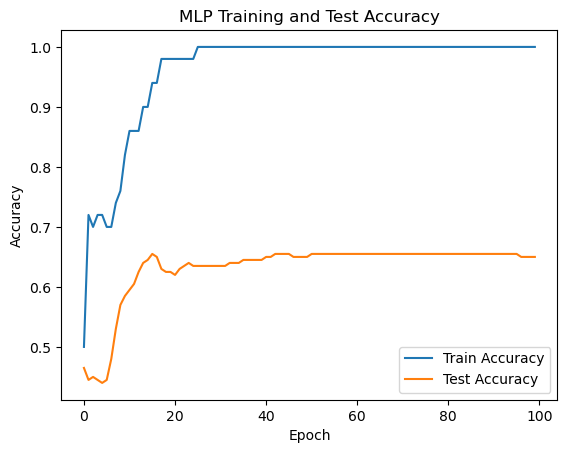

Total number of parameters: 256770


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract data
X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]  
hidden_dim = 256  
output_dim = 2  

model = MLP(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_acc_list, test_acc_list = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute training accuracy
    train_acc = (outputs.argmax(dim=1) == y_train).float().mean().item()
    test_acc = (model(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training and test accuracies
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training and Test Accuracy')
plt.show()

# Number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')


#### Output Summary

The test accuracy never reaches training accuracy, indicating that the model generalizes poorly to unseen data. The training accuracy reaching 100% while the test accuracy remains significantly lower (~65%) is a clear sign of overfitting.
This means the model has memorized the training data rather than learning generalizable features. The test accuracy stagnates around 63-65%, meaning the model stops improving on unseen data. Even though the loss continues to decrease, test accuracy does not improve after epoch 40. This further supports the idea that the model is overfitting.

Epoch [1/100], Loss: 0.6915, Train Accuracy: 0.4600, Test Accuracy: 0.5350
Epoch [2/100], Loss: 0.6005, Train Accuracy: 0.7600, Test Accuracy: 0.5200
Epoch [3/100], Loss: 0.5483, Train Accuracy: 0.7600, Test Accuracy: 0.5300
Epoch [4/100], Loss: 0.5107, Train Accuracy: 0.7600, Test Accuracy: 0.5600
Epoch [5/100], Loss: 0.4761, Train Accuracy: 0.7800, Test Accuracy: 0.5600
Epoch [6/100], Loss: 0.4433, Train Accuracy: 0.8200, Test Accuracy: 0.5650
Epoch [7/100], Loss: 0.4126, Train Accuracy: 0.8400, Test Accuracy: 0.5650
Epoch [8/100], Loss: 0.3845, Train Accuracy: 0.8600, Test Accuracy: 0.5650
Epoch [9/100], Loss: 0.3585, Train Accuracy: 0.8800, Test Accuracy: 0.5900
Epoch [10/100], Loss: 0.3341, Train Accuracy: 0.9000, Test Accuracy: 0.5950
Epoch [11/100], Loss: 0.3112, Train Accuracy: 0.9200, Test Accuracy: 0.6000
Epoch [12/100], Loss: 0.2898, Train Accuracy: 0.9200, Test Accuracy: 0.6150
Epoch [13/100], Loss: 0.2700, Train Accuracy: 0.9200, Test Accuracy: 0.6200
Epoch [14/100], Loss:

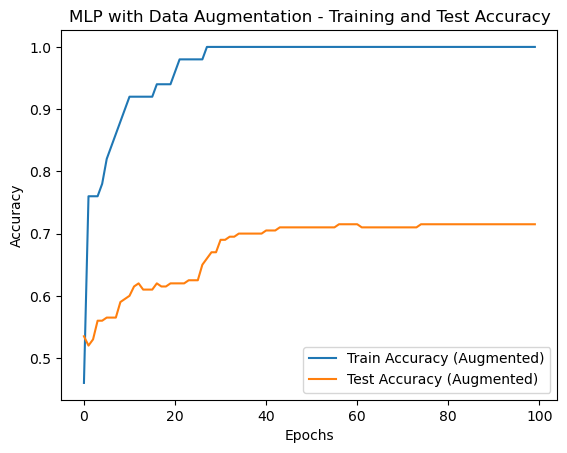

In [41]:
import random

# Data augmentation: Random circular shift with 50% probability
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    for i in range(len(X)):
        if random.random() < 0.5:
            shift = random.randint(1, X.shape[1] - 1)
            augmented_X.append(torch.roll(X[i], shifts=shift))
        else:
            augmented_X.append(X[i])
        augmented_y.append(y[i])

    return torch.stack(augmented_X), torch.tensor(augmented_y)

# Train with augmentation
aug_X_train, aug_y_train = augment_data(X_train, y_train)

# Reinitialize model
model_aug = MLP(input_dim, hidden_dim, output_dim)

# Train augmented model
train_acc_aug, test_acc_aug = [], []
optimizer = optim.Adam(model_aug.parameters(), lr=0.001)

for epoch in range(num_epochs):
    outputs = model_aug(aug_X_train)
    loss = criterion(outputs, aug_y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_acc = (outputs.argmax(dim=1) == aug_y_train).float().mean().item()
    test_acc = (model_aug(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_aug.append(train_acc)
    test_acc_aug.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot results
plt.plot(train_acc_aug, label='Train Accuracy (Augmented)')
plt.plot(test_acc_aug, label='Test Accuracy (Augmented)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("MLP with Data Augmentation - Training and Test Accuracy")
plt.show()


#### Output Summary
By around epoch 33, training accuracy reaches 100%, indicating that the model can perfectly interpolate the augmented training data. Test accuracy improves gradually and stabilizes around 72.5%. The model might have difficulty reaching 100% training accuracy if the limited data doesn't cover all possible transformations. By applying random circular shifts, each sample is presented in different forms over epochs. This forces the model to "memorize" the underlying invariant features rather than the specific positions. Achieving 100% training accuracy indicates that, with augmentation, the model can perfectly fit the (augmented) training data. Test accuracy around 72.5% suggests that while augmentation helps, the model still struggles to generalize fully due to the very small number of original training samples.

C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1653835329.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1653835329.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1653835329.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\

Epoch [1/100], Loss: 0.6930, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [2/100], Loss: 0.6924, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [3/100], Loss: 0.6918, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [4/100], Loss: 0.6912, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [5/100], Loss: 0.6906, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [6/100], Loss: 0.6901, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [7/100], Loss: 0.6895, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [8/100], Loss: 0.6889, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [9/100], Loss: 0.6883, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [10/100], Loss: 0.6877, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [11/100], Loss: 0.6870, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [12/100], Loss: 0.6864, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [13/100], Loss: 0.6858, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [14/100], Loss: 0.6852, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [15/100], Loss: 0.6846, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [16/100], Los

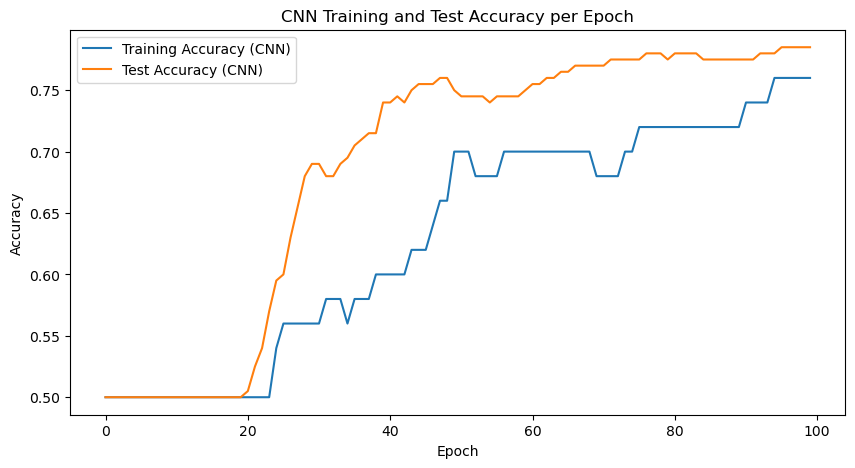

Total number of parameters in CNN: 450


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset from the pickle file
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# The dataset is assumed to be a list:
# data[0] -> X_train (shape: [50, 1000])
# data[1] -> y_train (shape: [50])
# data[2] -> X_test  (shape: [200, 1000])
# data[3] -> y_test  (shape: [200])
X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test  = torch.tensor(data[2], dtype=torch.float32)
y_test  = torch.tensor(data[3], dtype=torch.long)

# IMPORTANT: For Conv1d with built-in circular padding, the input must have shape [batch, channels, width].
# So, we explicitly add a channel dimension:
X_train = X_train.unsqueeze(1)  # Now [50, 1, 1000]
X_test = X_test.unsqueeze(1)    # Now [200, 1, 1000]

# Define the CNN Model using built-in circular padding
class CNN(nn.Module):
    def __init__(self, input_dim=1000, num_filters=16, kernel_size=25):
        super(CNN, self).__init__()
        # Use built-in circular padding:
        self.conv = nn.Conv1d(
            in_channels=1,
            out_channels=num_filters,
            kernel_size=kernel_size,
            padding=kernel_size // 2,  # For kernel_size=25, padding=12
            padding_mode='circular'
        )
        self.relu = nn.ReLU()
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # Global average pooling to enforce translation invariance.
        self.fc = nn.Linear(num_filters, 2)  # Final linear classifier for binary classification.

    def forward(self, x):
        # x is assumed to be [batch, 1, width]
        x = self.conv(x)
        x = self.relu(x)
        x = self.global_avg_pool(x)  # Shape: [batch, num_filters, 1]
        x = x.squeeze(2)             # Shape: [batch, num_filters]
        x = self.fc(x)               # Final output: [batch, 2]
        return x

# Initialize the CNN model
cnn = CNN(input_dim=1000, num_filters=16, kernel_size=25)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop for the CNN
num_epochs = 100
train_acc_cnn, test_acc_cnn = [], []

for epoch in range(num_epochs):
    outputs = cnn(X_train)  # X_train is [50, 1, 1000]
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    _, predicted = torch.max(outputs, 1)
    train_acc = (predicted == y_train).float().mean().item()
    train_acc_cnn.append(train_acc)

    # Compute test accuracy
    test_outputs = cnn(X_test)
    _, test_predicted = torch.max(test_outputs, 1)
    test_acc = (test_predicted == y_test).float().mean().item()
    test_acc_cnn.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
          f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_acc_cnn, label='Training Accuracy (CNN)')
plt.plot(range(num_epochs), test_acc_cnn, label='Test Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Test Accuracy per Epoch')
plt.show()

# Count total parameters in the CNN model
num_params_cnn = sum(p.numel() for p in cnn.parameters() if p.requires_grad)
print(f'Total number of parameters in CNN: {num_params_cnn}')


#### Output Summary

The model converges to a stable state with training accuracy around 76% and test accuracy around 78.5%. Given the extremely small training set (25 samples per class), these results are promising. The small gap between training and test accuracy suggests that the model generalizes fairly well despite the limited data. 